In [170]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import time


In [83]:
np.__version__

'1.23.5'

In [84]:
tf.__version__

'2.10.0'

In [85]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


## Loading in Datasets

In [181]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [182]:
pd.options.display.min_rows = 50
pd.set_option("display.max_columns", 100)
pd.options.display.float_format = '{:,.2f}'.format

In [183]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.38,-75.20,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65,-76.15,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.99,-100.99,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16,-100.15,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.84,-78.60,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.95,-78.54,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.34,-79.66,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35,-79.96,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.52,-87.35,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.18,-87.49,0


In [184]:
print(test.shape), print(train.shape)

(555719, 23)
(1296675, 23)


(None, None)

## Data Cleaning

In [185]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [186]:
print('Train Nulls')
train.isnull().sum() 

Train Nulls


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [187]:
print('Test Nulls')
test.isnull().sum()

Test Nulls


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

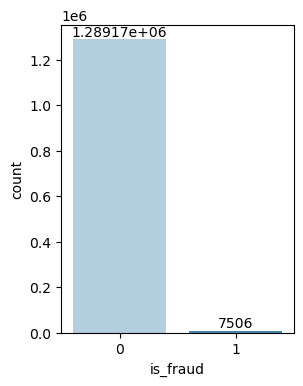

In [188]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud', data = train, palette='Blues')
for i in ax.containers:
    ax.bar_label(i,)

In [189]:
print('Train Data Distribution')
print('Real:', round(train['is_fraud'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Fraud:', round(train['is_fraud'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

Train Data Distribution
Real: 99.42 % of the dataset
Fraud: 0.58 % of the dataset


In [190]:
print('Test Data Distribution')
print('Real:', round(test['is_fraud'].value_counts()[0]/len(test) * 100,2), '% of the dataset')
print('Fraud:', round(test['is_fraud'].value_counts()[1]/len(test) * 100,2), '% of the dataset')

Test Data Distribution
Real: 99.61 % of the dataset
Fraud: 0.39 % of the dataset


In [191]:
train.duplicated(keep=False).value_counts()

False    1296675
Name: count, dtype: int64

## EDA

In [192]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,"1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00"
mean,"648,337.00","417,192,042,079,726,656.00",70.35,"48,800.67",38.54,-90.23,"88,824.44","1,349,243,636.73",38.54,-90.23,0.01
std,"374,317.97","1,308,806,447,000,789,248.00",160.32,"26,893.22",5.08,13.76,"301,956.36","12,841,278.42",5.11,13.77,0.08
min,0.00,"60,416,207,185.00",1.00,"1,257.00",20.03,-165.67,23.00,"1,325,376,018.00",19.03,-166.67,0.00
25%,"324,168.50","180,042,946,491,150.00",9.65,"26,237.00",34.62,-96.80,743.00,"1,338,750,742.50",34.73,-96.90,0.00
50%,"648,337.00","3,521,417,320,836,166.00",47.52,"48,174.00",39.35,-87.48,"2,456.00","1,349,249,747.00",39.37,-87.44,0.00
75%,"972,505.50","4,642,255,475,285,942.00",83.14,"72,042.00",41.94,-80.16,"20,328.00","1,359,385,375.50",41.96,-80.24,0.00
max,"1,296,674.00","4,992,346,398,065,154,048.00","28,948.90","99,783.00",66.69,-67.95,"2,906,700.00","1,371,816,817.00",67.51,-66.95,1.00


In [193]:
train['amt'].describe()

count   1,296,675.00
mean           70.35
std           160.32
min             1.00
25%             9.65
50%            47.52
75%            83.14
max        28,948.90
Name: amt, dtype: float64

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amt', ylabel='Probability'>

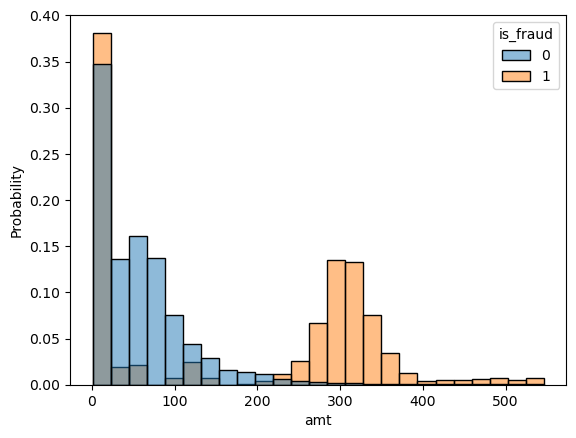

In [194]:
sns.histplot(x='amt', hue='is_fraud', bins = 25, stat='probability', data = train[train['amt'] <= train['amt'].quantile(0.99)], common_norm=False)

In [195]:
train.groupby('category')['is_fraud'].sum().sort_values(ascending=False)

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: is_fraud, dtype: int64

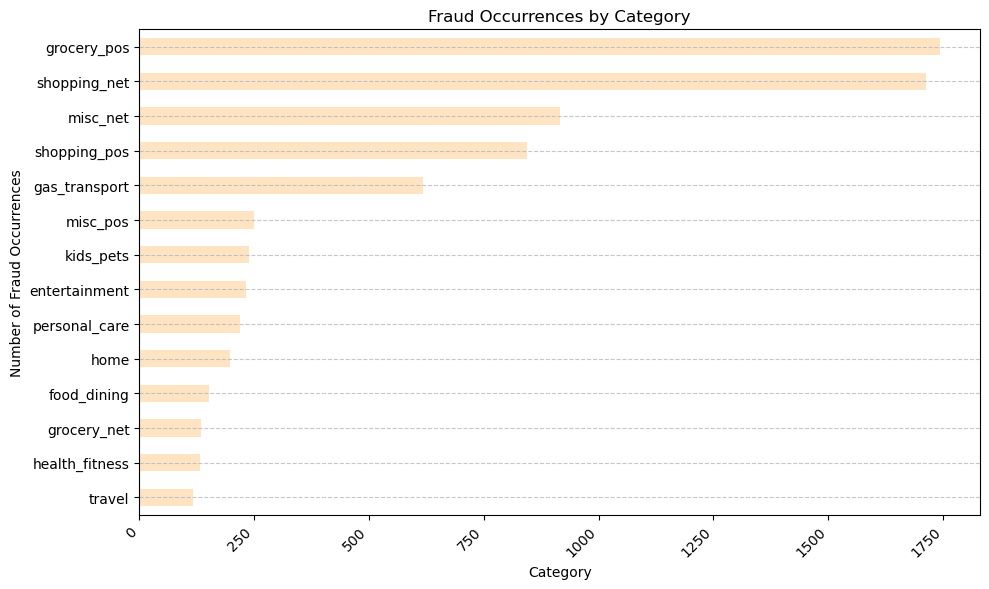

In [196]:
plt.figure(figsize=(10, 6))
train[train['is_fraud'] == 1].groupby('category')['is_fraud'].sum().sort_values(ascending=True).plot(kind='barh', color='bisque')
plt.title('Fraud Occurrences by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

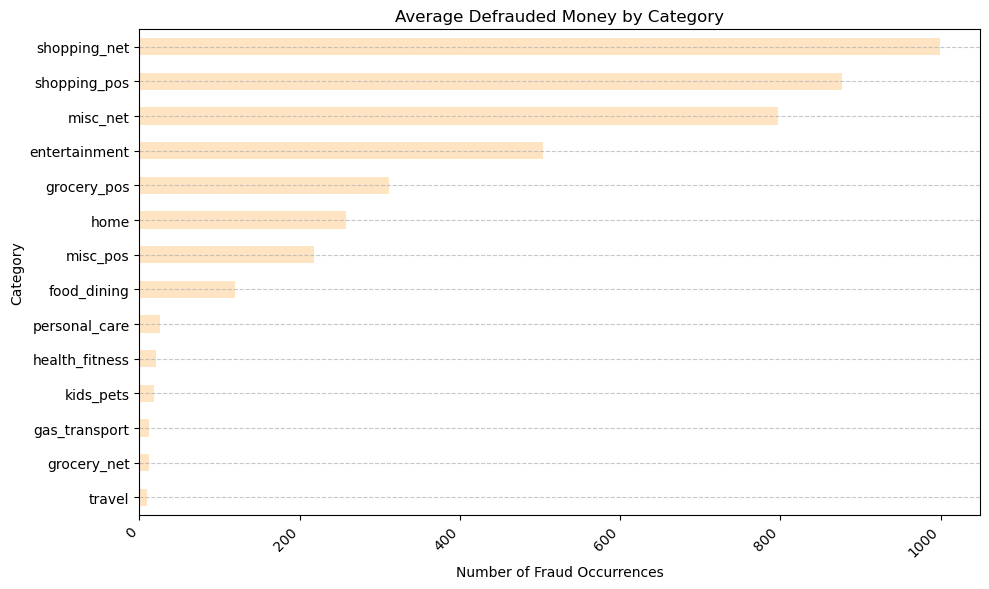

In [197]:
plt.figure(figsize=(10, 6))
train[train['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending=True).plot(kind='barh', color='bisque')
plt.title('Average Defrauded Money by Category')
plt.ylabel('Category')
plt.xlabel('Number of Fraud Occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

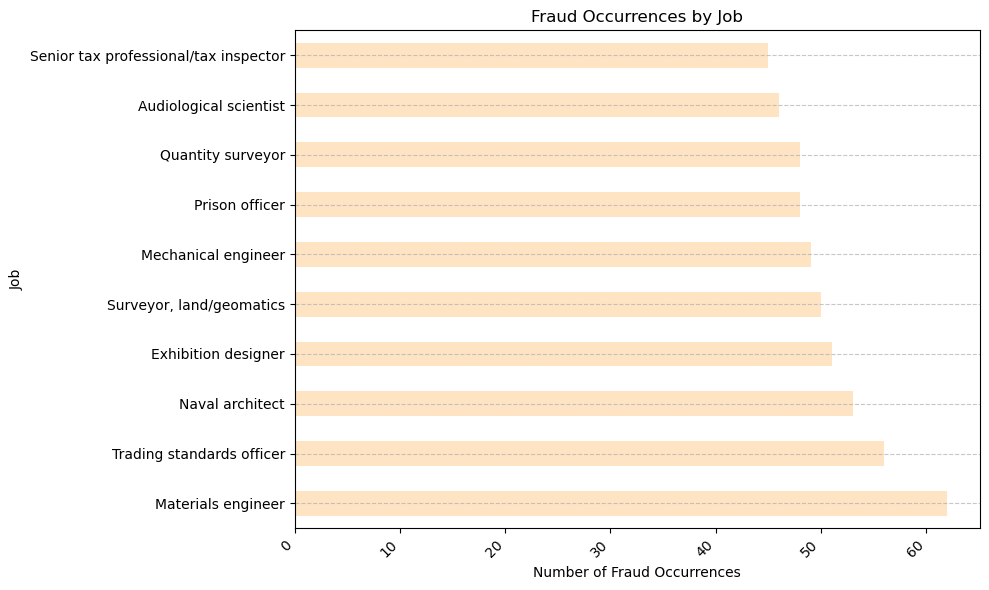

In [198]:
plt.figure(figsize=(10, 6))
train[train['is_fraud'] == 1]['job'].value_counts(sort = True, ascending=False).head(10).plot(kind='barh', color='bisque')
plt.title('Fraud Occurrences by Job')
plt.ylabel('Job')
plt.xlabel('Number of Fraud Occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Feature Engineering

In [104]:
train.drop(columns=["merchant", "first", "last", "street",
           "unix_time", "trans_num"], inplace=True)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amt_log', ylabel='Density'>

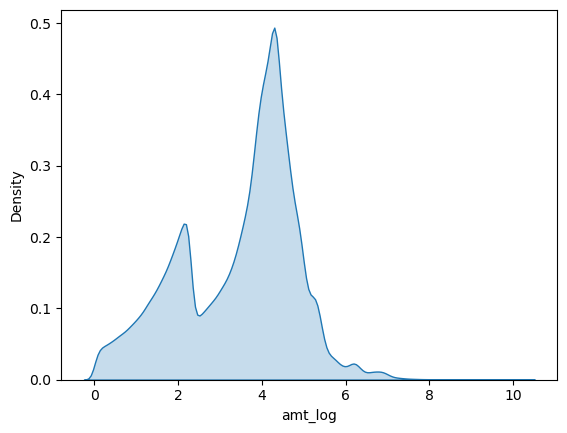

In [105]:
train["amt_log"] = np.log(train["amt"])
sns.kdeplot(train["amt_log"], fill=True)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


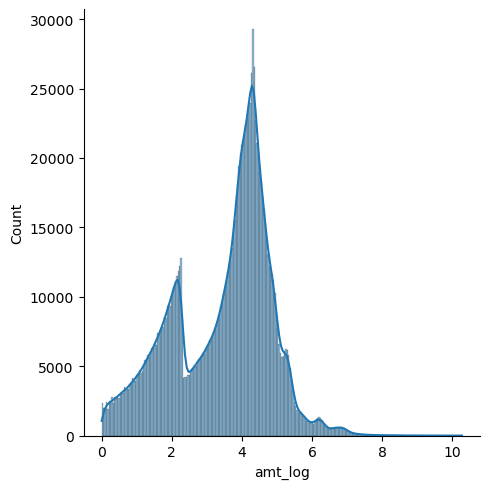

In [106]:
sns.displot(data = train, x='amt_log', kde= True)
plt.show()

In [107]:
def apply_encoder(train, columns):
    label = LabelEncoder()
    for i in columns:
        X = train[i]

        col_name = f'{i}'
        train[col_name] = label.fit_transform(X)

    return train

In [108]:
columns_to_encode = ["category", "state", "city", "job"]

train = apply_encoder(train, columns_to_encode)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


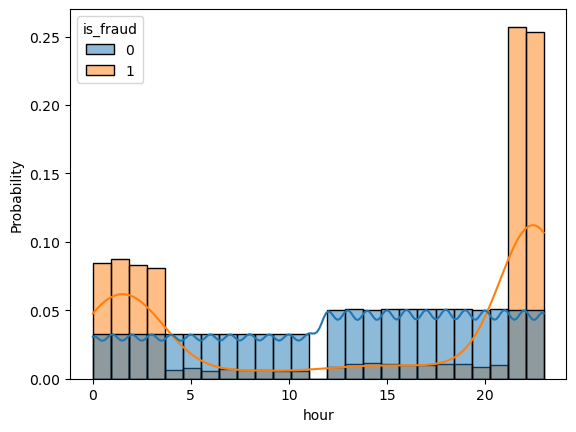

In [123]:
import datetime as dt
train['hour'] = pd.to_datetime(train['trans_date_trans_time']).dt.hour
sns.histplot(data=train, x='hour', hue = 'is_fraud', bins = 25, stat='probability', common_norm=False, kde=True)
plt.show()

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


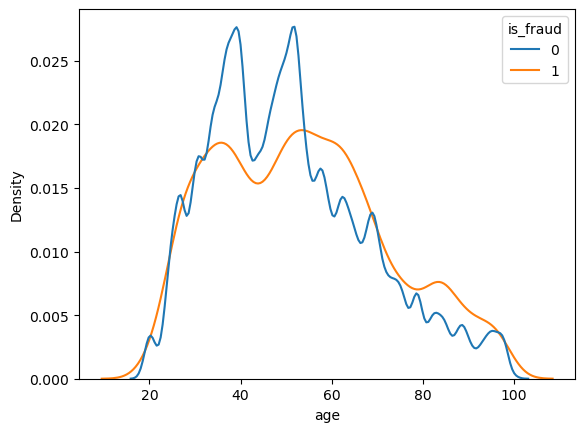

In [115]:
train['age'] = dt.date.today().year-pd.to_datetime(train['dob']).dt.year
sns.kdeplot(data = train, x='age', hue = 'is_fraud', common_norm=False)
plt.show()

In [124]:
train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
category                   int32
amt                      float64
gender                    object
city                       int32
state                      int32
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int32
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
amt_log                  float64
age                        int32
hour                       int32
dtype: object

In [125]:
X = train.drop(columns=["is_fraud", "amt", "trans_date_trans_time", "city", "state", "category", "gender", "dob", "job"])
y = train["is_fraud"]

In [126]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42)

In [127]:
X_under, y_under = undersampler.fit_resample(X,y)

In [128]:
print('Train Data Distribution')
print('Real:', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Fraud:', round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Train Data Distribution
Real: 83.33 % of the dataset
Fraud: 16.67 % of the dataset


In [129]:
print('Train Data Distribution')
print('Real:', round(y_under.value_counts()[0]))
print('Fraud:', round(y_under.value_counts()[1]))

Train Data Distribution
Real: 37530
Fraud: 7506


## Feature Engineering on Test Set

In [130]:
test.drop(columns=["merchant", "first", "last", "street",
           "unix_time", "trans_num"], inplace=True)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amt_log', ylabel='Density'>

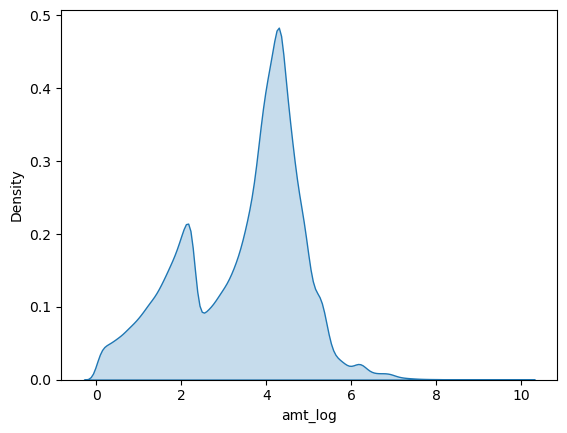

In [131]:
test["amt_log"] = np.log(test["amt"])
sns.kdeplot(test["amt_log"], fill=True)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


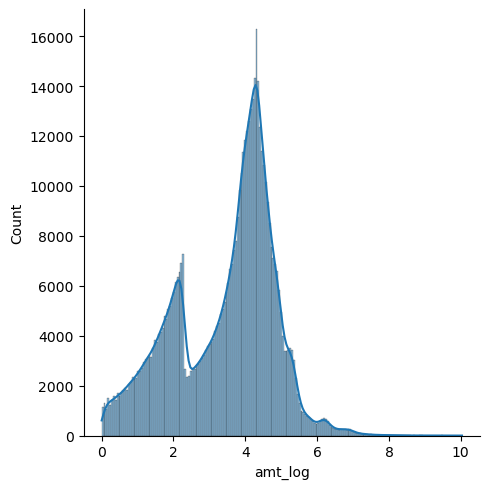

In [132]:
sns.displot(data = test, x='amt_log', kde= True)
plt.show()

In [133]:
columns_to_encode = ["category", "state", "city", "job"]

train = apply_encoder(test, columns_to_encode)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


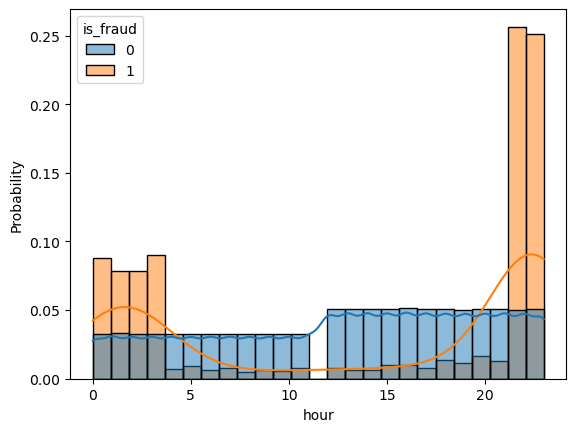

In [134]:
import datetime as dt
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour
sns.histplot(data=test, x='hour', hue = 'is_fraud', bins = 25, stat='probability', common_norm=False, kde=True)
plt.show()

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


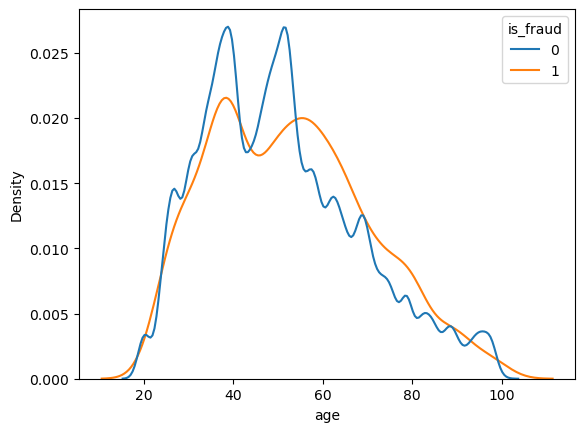

In [135]:
test['age'] = dt.date.today().year-pd.to_datetime(test['dob']).dt.year
sns.kdeplot(data = test, x='age', hue = 'is_fraud', common_norm=False)
plt.show()

In [136]:
test.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
category                   int32
amt                      float64
gender                    object
city                       int32
state                      int32
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int32
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
amt_log                  float64
hour                       int32
age                        int32
dtype: object

In [152]:
X_test = test.drop(columns=["is_fraud", "amt", "trans_date_trans_time", "city", "state", "category", "gender", "dob", "job"])
y_test = test["is_fraud"]

## Training Model

In [140]:
X_train, X_valid, y_train, y_valid = train_test_split(X_under, y_under, stratify=y_under, test_size=0.2)

In [148]:
from sklearn.metrics import roc_auc_score, classification_report
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
learn_rate = np.linspace(0.001, 2, 150)
min

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
lgbm = LGBMClassifier(random_state=42)

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    'learning_rate': np.linspace(0.001, 2, 150),
    'n_estimators': randint(6,11), 
    'base_estimator__max_depth': [1,10,11,12,13,14,15] 
}

gbt = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(random_state=42),
    param_distributions = param_distributions,
    n_iter = 10,
    n_jobs = -1,
    refit = True
)
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [174]:
y_pred = gbt.predict(X_valid)

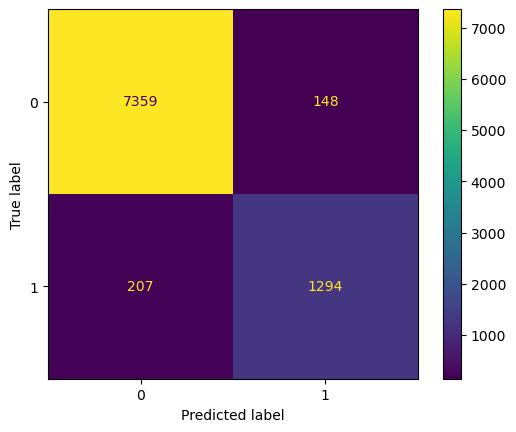

In [175]:
cm = confusion_matrix(y_valid, y_pred)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [176]:
print(classification_report(y_valid, gbt.predict(X_valid), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.98      7507
       Fraud       0.90      0.86      0.88      1501

    accuracy                           0.96      9008
   macro avg       0.94      0.92      0.93      9008
weighted avg       0.96      0.96      0.96      9008



In [177]:
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: ", accuracy)
precision = metrics.precision_score(y_valid, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_valid, y_pred)
print("Recall: ", recall)
f1 = metrics.f1_score(y_valid, y_pred)
print("F1 Score: ", f1)

Accuracy:  0.9605905861456483
Precision:  0.897364771151179
Recall:  0.8620919387075283
F1 Score:  0.8793747876316684


In [150]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier()
param_distributions = {
    'learning_rate': np.linspace(0.001, 2, 150),
    'n_estimators': randint(6,11), 
    'base_estimator__max_depth': [1,10,11,12,13,14,15] 
}

adaboost = AdaBoostClassifier(base_estimator=base_estimator)
adaboost_random = RandomizedSearchCV(adaboost, param_distributions, n_iter=100, cv=10, scoring='accuracy', n_jobs=-1)
adaboost_random.fit(X_train, y_train)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': [1, 10, 11,
                                                                      12, 13,
                                                                      14, 15],
                                        'learning_rate': array([1.00000000e-03, 1.44161074e-02, 2.78322148e-02, 4.12483221e-02,
       5.46644295e-02, 6.80805369e-02, 8.14966443e-02, 9.49127517e-02,
       1.08328859e-01, 1.217...
       1.77192617e+00, 1.78534228e+00, 1.79875839e+00, 1.81217450e+00,
       1.82559060e+00, 1.83900671e+00, 1.85242282e+00, 1.86583893e+00,
       1.87925503e+00, 1.89267114e+00, 1.90608725e+00, 1.91950336e+00,
       1.93291946e+00, 1.94633557e+00, 1.95975168e+00, 1.97316779e+00,
       1.98658389e+00, 2.00000000e+00]),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020E762DF250>},
                   scoring='accuracy')

In [163]:
y_pred = adaboost_random.predict(X_valid)

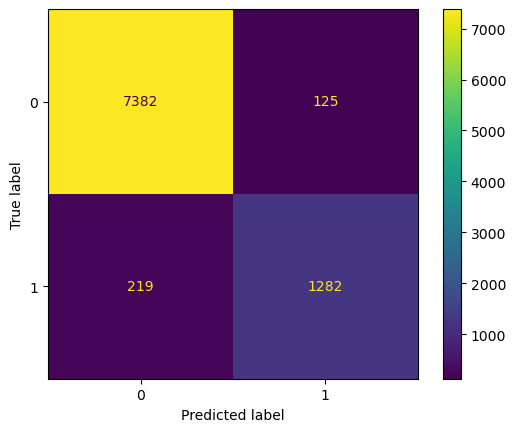

In [159]:
cm = confusion_matrix(y_valid, y_pred)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [160]:
print(classification_report(y_valid, adaboost_random.predict(X_valid), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.98      7507
       Fraud       0.91      0.85      0.88      1501

    accuracy                           0.96      9008
   macro avg       0.94      0.92      0.93      9008
weighted avg       0.96      0.96      0.96      9008



In [169]:
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: ", accuracy)
precision = metrics.precision_score(y_valid, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_valid, y_pred)
print("Recall: ", recall)
f1 = metrics.f1_score(y_valid, y_pred)
print("F1 Score: ", f1)

Accuracy:  0.9618117229129662
Precision:  0.9111584932480455
Recall:  0.8540972684876749
F1 Score:  0.8817056396148555
